# Introduction to Data Science - Week 6 Classification

In [374]:
# Data and plotting imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Machine learning imports
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [375]:
# https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
# A Function to plot decision boundarys
def plot_decision(X,y,model,n_classes=2):
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    model.fit(X, y)
    yhat = model.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='binary_r')
    for class_value in range(n_classes):
        row_ix = np.where(y == class_value)
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')

## Dataset

The training dataset for this week comes from [🍌 | Banana Quality](https://www.kaggle.com/datasets/l3llff/banana). This is a well-curated dataset that contains numerical information about bananas of different quality (size, weight, sweetness, softness, harvest time, ripeness, acidity, quality).

In [376]:
# Read in data
df = pd.read_csv("../data/banana_quality.csv")

In [377]:
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [378]:
# Replace Banana with "Quality = Good" with 0
df.loc[(df["Quality"]=="Good"), 'Quality'] = 0
# Replace Banana with "Quality = Bad" with 1
df.loc[(df["Quality"]=="Bad"), 'Quality'] = 1

#Sort and get the first 1500 Good bananas and last 1500 Bad bananas (balances classes)
Good_banana = df.sort_values("Quality")[0:1500]
Bad_banana = df.sort_values("Quality")[-1500:]
df = pd.concat([Good_banana,Bad_banana])
df

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,0
4641,4.468235,-1.124668,-0.518901,1.419917,4.711023,0.694413,0.412244,0
4642,1.210119,-0.143880,-3.656017,1.356733,0.387546,0.361400,0.190619,0
4643,3.686907,-2.087548,-1.568504,-0.474426,2.799413,0.342410,0.448430,0
4644,0.823275,-1.069054,-0.785325,1.740380,-0.654759,3.405668,-3.737373,0
...,...,...,...,...,...,...,...,...
3344,1.108823,-1.558775,-1.999696,-0.137966,0.482237,4.211009,-3.452974,1
3345,-2.375734,0.076607,-1.133013,-0.478322,-3.702170,-0.878545,-1.883370,1
3346,-2.686831,-2.696910,-2.094800,-2.665348,-2.003175,0.260136,-0.629409,1
3333,-4.557154,-2.303473,-2.050439,-1.850534,-1.116998,0.399142,-2.160284,1


## KNN

In [379]:
# Pick features
feature1 = "Size"
feature2 = "Weight"

In [380]:
# number of nearest neighbours used for matching (1,3,5,7,9)
k = 1

In [381]:
# Train model, plot decision boundary 
x = df[[feature1,feature2]].values
y = pd.to_numeric(df["Quality"])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [382]:
# Accuracy
y_pred = model.predict(x_test)
num_incorrect = (y_test != y_pred).sum()
total = y_test.shape[0]
acc = (total - num_incorrect) / total * 100
print("Accuracy:", acc)

# Codes from: scikit-learn 1.4.1-3.3.2. Classification metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
# Confusion Matrix
from sklearn.metrics import  confusion_matrix ,precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Accuracy: 72.77777777777777
Confusion Matrix:
[[347 146]
 [ 99 308]]
Precision: 0.6784140969162996
Recall: 0.7567567567567568


/var/folders/bt/x0byvntj4bbgqp2qt26fqtbc0000gn/T/ipykernel_1485/3030500797.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


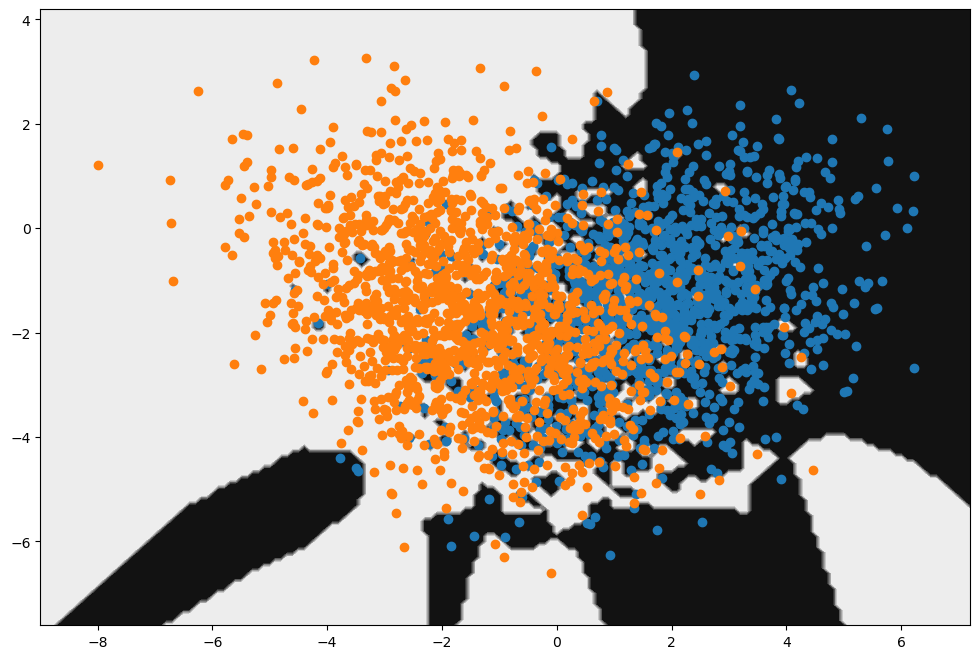

In [383]:
#Plot decision boundary 
plt.figure(figsize=(12,8))
plot_decision(x, y, model, 2)

## Decision Trees 

In [384]:
# Pick features
feature1 = "Size"
feature2 = "Weight"

In [385]:
# Pick max_depth (3,4,5)
max_depth = 3

In [386]:
# Train model, plot decision boundary 
x = df[[feature1,feature2]].values
y = pd.to_numeric(df["Quality"])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [387]:
# Accuracy
y_pred = model.predict(x_test)
num_incorrect = (y_test != y_pred).sum()
total = y_test.shape[0]
acc = (total - num_incorrect) / total * 100
print("Accuracy:", acc)

# Confusion Matrix
from sklearn.metrics import  confusion_matrix ,precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Accuracy: 81.88888888888889
Confusion Matrix:
[[419  74]
 [ 89 318]]
Precision: 0.8112244897959183
Recall: 0.7813267813267813


/var/folders/bt/x0byvntj4bbgqp2qt26fqtbc0000gn/T/ipykernel_1485/3030500797.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')


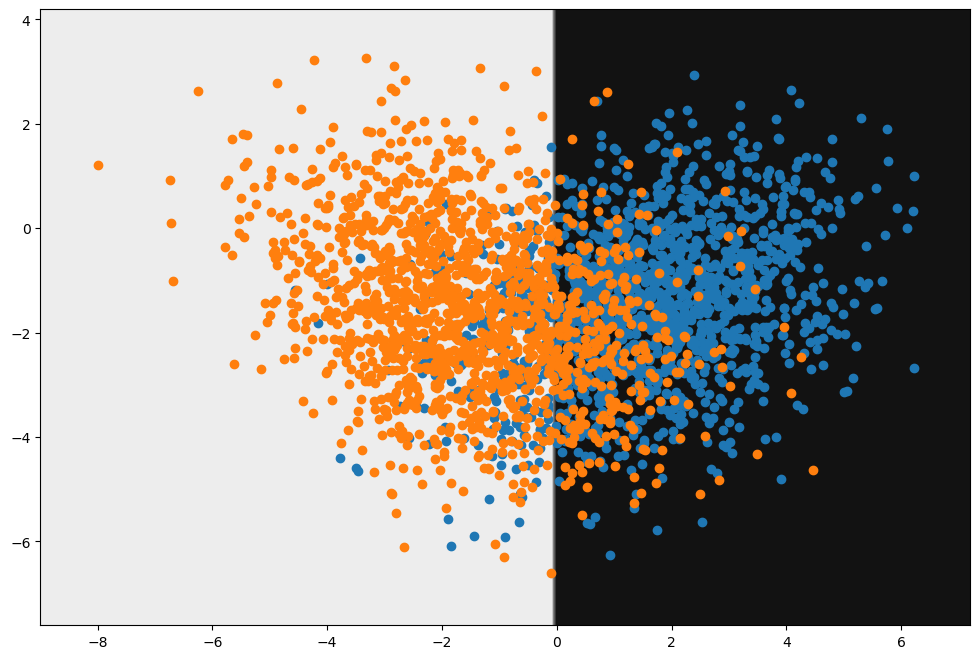

In [388]:
#Plot decision boundary 
plt.figure(figsize=(12,8))
plot_decision(x, y, model, 2)

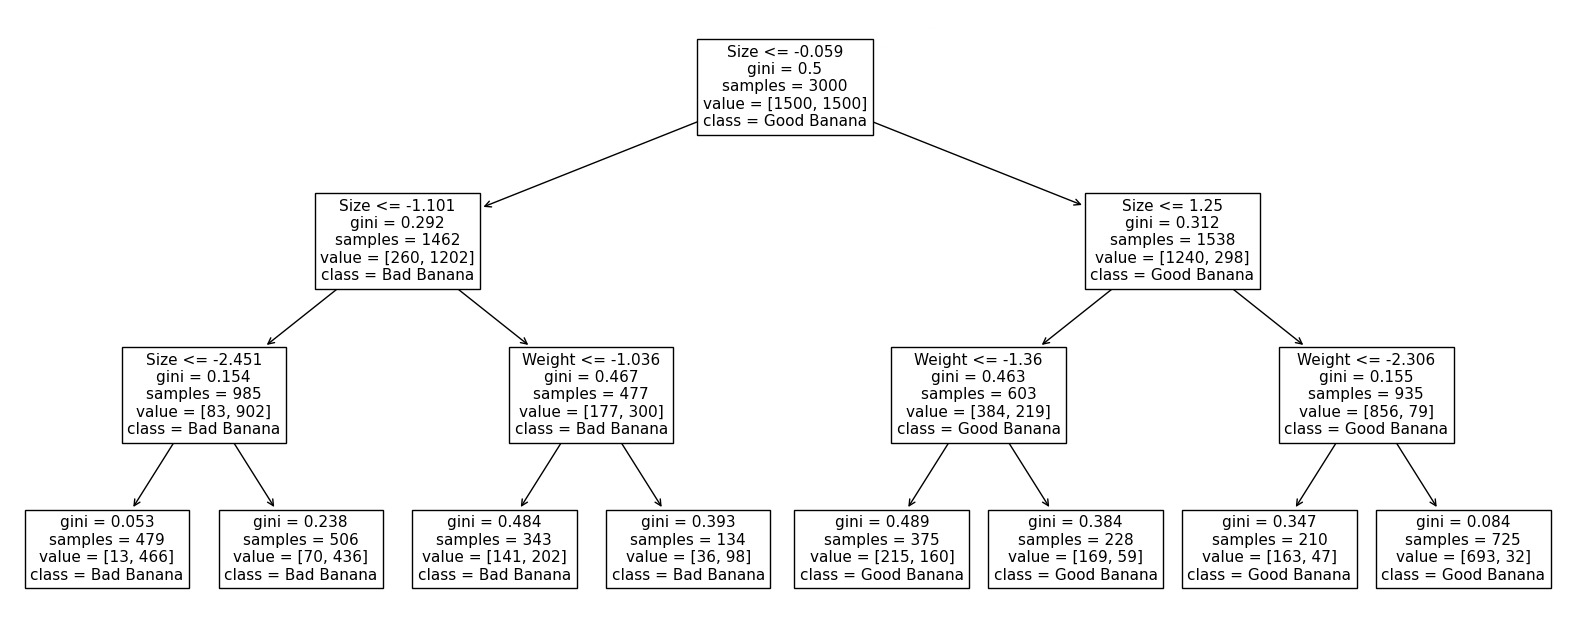

In [389]:
plt.figure(figsize=(20,8))
my_tree = plot_tree(model, feature_names=[feature1, feature2],fontsize=11,class_names = ["Good Banana","Bad Banana"]) 

## More features

In [390]:
#Pick max_depth
max_depth = 5

Accuracy: 93.0
Confusion Matrix:
[[451  42]
 [ 21 386]]
Precision: 0.9018691588785047
Recall: 0.9484029484029484


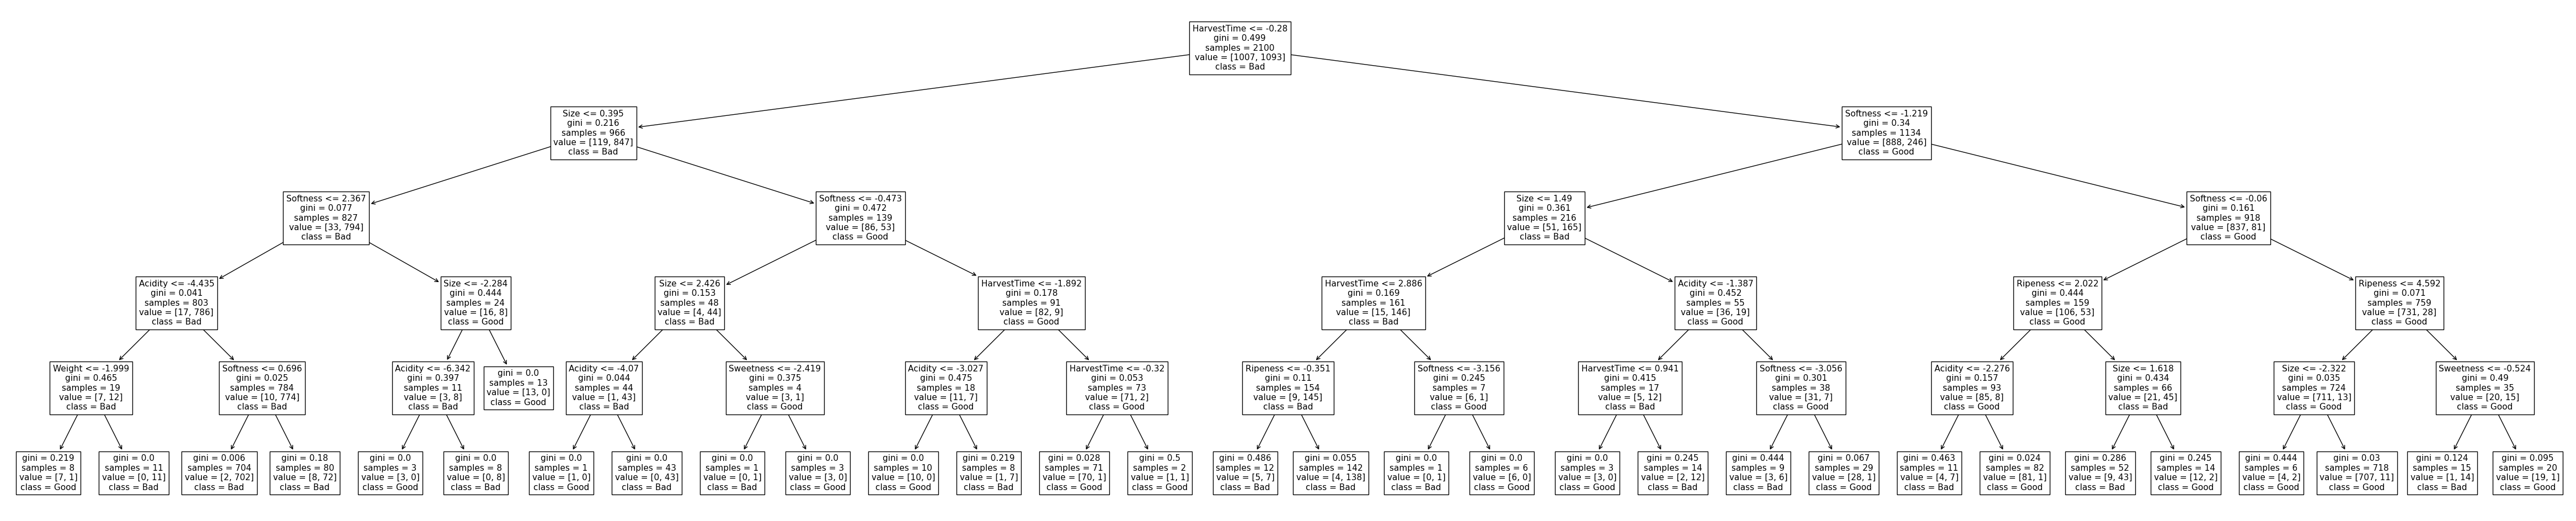

In [391]:
# Pick all features for input
x_labels = list(df.columns.values)
x_labels.remove("Quality")
x = df[x_labels]

# Fit model
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(x_train,y_train)

# Accuracy
y_pred = model.predict(x_test)
num_incorrect = (y_test != y_pred).sum()
total = y_test.shape[0]
acc = (total - num_incorrect) / total * 100
print("Accuracy:", acc)

# Confusion Matrix
from sklearn.metrics import  confusion_matrix ,precision_score, recall_score
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

plt.figure(figsize=(60,12))
my_plot = plot_tree(model, feature_names=x_labels,fontsize=11,class_names = ["Good","Bad"]) 